In [1]:
import requests
import pandas as pd

In [2]:
start='2022-03-02'
to='2022-04-01'
myurl='https://transparency.entsog.eu/api/v1/aggregateddata.xlsx?forceDownload=true&pointDirection=uk-iuk-----uk-tso-0003entrytransmissionuk---------,uk---------uk-tso-0001exitdistribution,uk---------uk-tso-0001entrystorage,uk---------uk-tso-0001exittransmissionuk-iuk-----,uk---------uk-tso-0001exitstorage,uk---------uk-tso-0001entrytransmissionnl---------,uk-iuk-----uk-tso-0003exittransmissionbe-lux------,uk---------ie-tso-0001exittransmissionuk-ni------,uk---------uk-tso-0001exitfinal%20consumers,uk---------uk-tso-0001entrytransmission,uk---------uk-tso-0001exittransmissionnl---------,uk---------uk-tso-0001exittransmissionie---------,uk---------uk-tso-0001entrytransmissionie---------%7Ctransmissionuk-ni------,uk-iuk-----uk-tso-0003entrytransmissionbe-lux------,uk---------uk-tso-0001entryproduction,uk---------uk-tso-0001entrytransmissionuk-iuk-----,uk---------ie-tso-0001entrytransmissionuk-ni------,uk---------uk-tso-0001entrylng%20terminals,uk---------uk-tso-0001entrytransmissionie---------,uk---------uk-tso-0001exittransmissionie---------%7Ctransmissionuk-ni------&from={}&to={}&indicator=Physical%20Flow&periodType=day&timezone=CET&limit=-1'.format(start,to)
response=requests.get(myurl)
print(response)

<Response [200]>


In [3]:
df=pd.read_excel(myurl)
print(df)

                                                    id  dataSet dataSetLabel  \
0    1AggregatesUKUK---------UK-TSO-0001entryLNG Te...        1   Aggregates   
1    1AggregatesUKUK---------UK-TSO-0001entryProduc...        1   Aggregates   
2    1AggregatesUKUK---------UK-TSO-0001entryStorag...        1   Aggregates   
3    1AggregatesUKUK---------UK-TSO-0001entryTransm...        1   Aggregates   
4    1AggregatesUKUK---------UK-TSO-0001exitDistrib...        1   Aggregates   
..                                                 ...      ...          ...   
388  1AggregatesUKUK---------UK-TSO-0001exitFinal C...        1   Aggregates   
389  1AggregatesUKUK---------UK-TSO-0001exitStorage...        1   Aggregates   
390  1AggregatesUKUK---------UK-TSO-0001exitTransmi...        1   Aggregates   
391  1AggregatesUKUK---------UK-TSO-0001exitTransmi...        1   Aggregates   
392  1AggregatesUKUK---------UK-TSO-0001exitTransmi...        1   Aggregates   

         indicator periodType        pe

In [4]:
df_subset=df[['directionKey','day','value']]
print(df_subset)

    directionKey  day       value
0          entry    2  1035183603
1          entry    2   345650519
2          entry    2   259452289
3          entry    2  1536647881
4           exit    2  2195868859
..           ...  ...         ...
388         exit    1   836675105
389         exit    1    17823858
390         exit    1   210089700
391         exit    1   163804532
392         exit    1   418591488

[393 rows x 3 columns]


In [5]:
values_by_entry=df_subset.pivot_table(index=['day','directionKey'])
print(values_by_entry)

                         value
day directionKey              
1   entry         6.871788e+08
    exit          5.952100e+08
2   entry         5.673980e+08
    exit          4.903763e+08
3   entry         5.757948e+08
...                        ...
29  exit          4.221818e+08
30  entry         5.339540e+08
    exit          4.603332e+08
31  entry         1.777257e+08
    exit          3.510999e+08

[62 rows x 1 columns]


<AxesSubplot:xlabel='day,directionKey'>

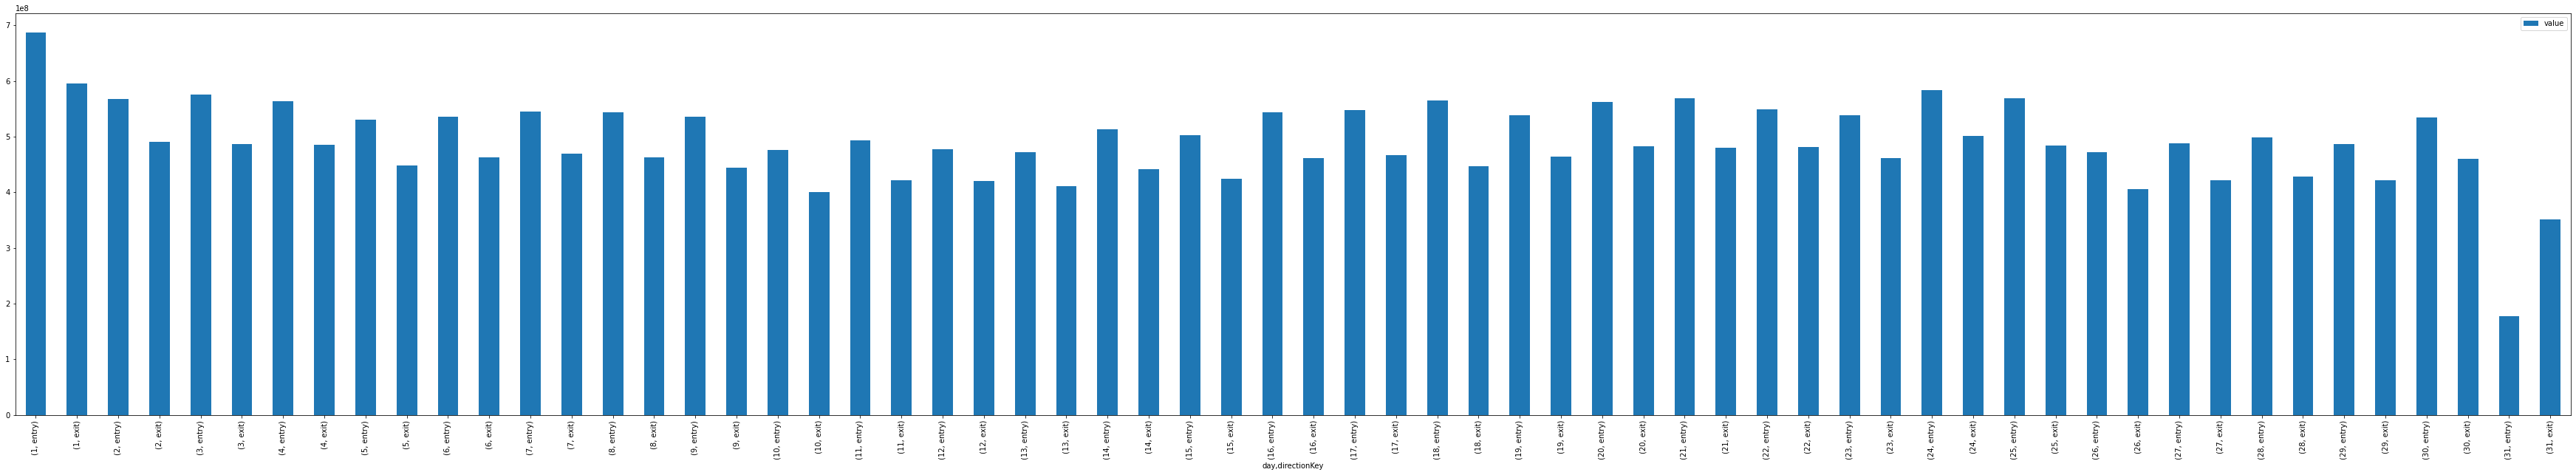

In [6]:
values_by_entry.plot(kind='bar',figsize=(62,10))